# Workshop : Python, DICOM Files and Beyond 

As explained in our seminar DICOM files are containers of radiographic data holding not only **the image** but also supporting **metadata** 

In this notebook, we will introduce you to a very handy library in Python called *Pydicom* and we will use this tool to read dicom files, extract important pieces of information, visualise 2D and 3D images as well as using DICOM files to peak into insights of our data.

During our workshop I want you to try to use Pydicom's documentation to explore more on its functionality : https://pydicom.github.io/pydicom/stable/tutorials/dataset_basics.html

The hippocampus MRI dataset that will be used is [this one](https://www.kaggle.com/datasets/aryashah2k/hippocampal-sparing-dataset). It has a CC BY 3.0 licence, which means it is free to use for commercial use. Dataset features include:

1GB size - course participants will download the dataset directly to the Colab instance and decompress it using the following commands:

To download the dataset we are going to work with please copy and paste into ur terminal : 
```bash
kaggle datasets download aryashah2k/hippocampal-sparing-dataset
unzip hippocampal-sparing-dataset.zip
```
you might need to install kaggle using :
```bash
pip install kaggle
```


In [2]:
## first please make sure you are set with the required packages by running this cell 
import pandas as pd 
import numpy as np 
import pydicom
import matplotlib.pyplot as plt
import os

### Yay ! We are Set Up!!
Now let us begin having fun with DICOM files 

## 1. Loving Your Metadata

In [3]:
## as this is an MRI multiple files account for mutiple slices
## for now we will only read on single slice for every patient to extract relevant MetaData

example_dcm=pydicom.dcmread("HippocampalMRISlices/01/MR.1.2.246.352.221.478795775126922662561249727364263601.dcm")

In [4]:
example_dcm

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 182
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.246.352.221.478795775126922662561249727364263601
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002,0013) Implementation Version Name         SH: 'DCIE 2.2'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008,0012) Instance Creation Date              DA: '20220622'
(0008,0013) Instance Creation Time              TM: '115002'
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                 

In [5]:
## to access one of the dicom metadata, you need to use its corresponding pydicom attribute 
print(example_dcm.dir())

['AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'ContrastBolusAgent', 'ContrastBolusRoute', 'DeidentificationMethod', 'DeidentificationMethodCodeSequence', 'EchoTime', 'EchoTrainLength', 'FrameOfReferenceUID', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'LongitudinalTemporalInformationModified', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'PatientBirthDate', 'PatientID', 'PatientIdentityRemoved', 'PatientName', 'PatientPosition', 'PatientSex', 'PhotometricInterpretation', 'PixelData', 'PixelRepresentation', 'PixelSpacing', 'PositionReferenceIndicator', 'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'ScanOptions', 'ScanningSequence', 'SequenceVariant', 'SeriesInstanceUID', 'SeriesNumber', 'SliceLocation', 'SliceThickness', 'SoftwareVersions', 'SpecificCharacterSet', 'StudyDate', 'S

In [6]:
print(example_dcm.PatientID)

uWiqM844A9jDh4pqNrtDs59C2


Note you might find many of the metadata dicom tags such age, gender,name and study date empty as this data is for public use and has been deindentified, also note "Patient Identity Removed" attribute being saved as "Yes" so you always know if your data was deindentified or not !

In [7]:
### TASK 1 
'''
Write the following sentence using the our example dicom file 
" Patient with ID  of {patient id} had undergone an {modality} using a device manufactured by {manufacturer}. 
Patient position was {position of patient while undergoing study} and and recieced contrast via {way of contrast intake}.
'''
## Solution 1 
print(f"Patient with ID {example_dcm.PatientID} had undergone an {example_dcm.Modality} using a device manufactured by {example_dcm.Manufacturer}.")
print(f"Patient position was {example_dcm.PatientPosition} and and recieced contrast via {example_dcm.ContrastBolusRoute}")

Patient with ID uWiqM844A9jDh4pqNrtDs59C2 had undergone an MR using a device manufactured by GE MEDICAL SYSTEMS.
Patient position was HFS and and recieced contrast via IV


In [8]:
## TASK 2 : create a pandas series named example_series with the following tags : ID , Modality, Position, Contrast Route
## use our example_dcm to add values to keys of example_series
## Solution 2 
example_series= pd.Series({"ID":example_dcm.PatientID,
"Modality":example_dcm.Modality, "Position":example_dcm.PatientPosition,"Contrast Route": example_dcm.ContrastBolusRoute})

print(example_series)

ID                uWiqM844A9jDh4pqNrtDs59C2
Modality                                 MR
Position                                HFS
Contrast Route                           IV
dtype: object


In [9]:
# a quick refresher before our next task , this is how you list items in a folder

print(os.listdir("HippocampalMRISlices"))

['10', '20', '17', '18', '12', '22', '11', '04', '06', '14', '21', '24', '02', '19', '03', '23', '07', '08', '16', '25', '05', '13', '09', '15', '01']


In [10]:
## TASK 3 : create a dataframe named patient_data for all patients in the HippocampalMRISlices  folder with the following columns :
#  ID, Modality, Body Part, and Position
patient_data=pd.DataFrame(columns=["ID","Modality","Body Part","Position"])

for patient in os.listdir("HippocampalMRISlices"):
    base_path=f"HippocampalMRISlices/{patient}/"
    first_slice=os.listdir(base_path)[0]
    temporary_dcm=pydicom.dcmread(base_path+first_slice)
    patient_data.loc[len(patient_data)] = (temporary_dcm.PatientID,temporary_dcm.Modality,temporary_dcm.BodyPartExamined,temporary_dcm.PatientPosition)

del temporary_dcm
patient_data

,ID,Modality,Body Part,Position
0,VdQuNEovq74GZdUJixmOfGgV8,MR,HEAD,HFS
1,titiHOLON2LWO1x9tG3rGxnMs,MR,BRAIN,HFS
2,EXQVuAOQkCFzkdgJg9xK3eETs,MR,HEAD,HFS
3,gi1NRCUgWTht6NEMF8Xvr4lRV,MR,HEAD,HFS
4,oVSx1XroXOlXZypE2jWNWRsBd,MR,HEAD,HFS
5,kMMYOfxupRMyqY1D8zD8NVt24,MR,HEAD,HFS
6,YqqViwxoFcBwck43rzSIoLLG7,MR,HEAD,HFS
7,IS9wrCMI8bdKf3MMFoG5WZEPf,MR,HEAD,HFS
8,iRoBBA69GzC8mkLukje2eD012,MR,HEAD,HFS
9,HR3BYkuJUcowGNZmDC4ija87z,MR,HEAD,HFS


In [11]:
## TASK 5 , find patients where with a missing ContrastBolusRoute attribute 
# add new column that writes the route if attribute is present and "Nil" if attribute is missing
# for presence of contrast , name the "Contrast"
contrast=[]
for patient in os.listdir("HippocampalMRISlices"):
    base_path=f"HippocampalMRISlices/{patient}/"
    first_slice=os.listdir(base_path)[0]
    temporary_dcm=pydicom.dcmread(base_path+first_slice)
    try:
        contrast.append(temporary_dcm.ContrastBolusRoute)
    except:
        contrast.append("Nil")
del temporary_dcm
print(contrast)
patient_data["Contrast"]=contrast
patient_data

['Nil', 'IV', 'IV', 'Nil', 'Nil', 'IV', 'Nil', 'IV', 'IV', 'Nil', 'IV', 'IV', 'IV', 'Nil', 'Nil', 'IV', 'IV', 'IV', 'IV', 'Nil', 'Nil', 'Nil', 'IV', 'Nil', 'IV']


,ID,Modality,Body Part,Position,Contrast
0,VdQuNEovq74GZdUJixmOfGgV8,MR,HEAD,HFS,Nil
1,titiHOLON2LWO1x9tG3rGxnMs,MR,BRAIN,HFS,IV
2,EXQVuAOQkCFzkdgJg9xK3eETs,MR,HEAD,HFS,IV
3,gi1NRCUgWTht6NEMF8Xvr4lRV,MR,HEAD,HFS,Nil
4,oVSx1XroXOlXZypE2jWNWRsBd,MR,HEAD,HFS,Nil
5,kMMYOfxupRMyqY1D8zD8NVt24,MR,HEAD,HFS,IV
6,YqqViwxoFcBwck43rzSIoLLG7,MR,HEAD,HFS,Nil
7,IS9wrCMI8bdKf3MMFoG5WZEPf,MR,HEAD,HFS,IV
8,iRoBBA69GzC8mkLukje2eD012,MR,HEAD,HFS,IV
9,HR3BYkuJUcowGNZmDC4ija87z,MR,HEAD,HFS,Nil


In [12]:
## TASK 6: Double check if indeed all patient files are anonynmized (deindentified)
## create a list with the appropriate attribute and then check if all values are YES
anonymized=[]
for patient in os.listdir("HippocampalMRISlices"):
    base_path=f"HippocampalMRISlices/{patient}/"
    first_slice=os.listdir(base_path)[0]
    temporary_dcm=pydicom.dcmread(base_path+first_slice)
    anonymized.append(temporary_dcm.PatientIdentityRemoved)
print(anonymized)
print(f"Number of patients that are not anonymized are  {sum([a!="YES" for a in anonymized])}")

['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES']
Number of patients that are not anonymized are  0


## 2. It's Imagin' Time !

In [13]:
## Now I need to understand that every dcm file in our folders is a slice of an 3D MRI image
## to access the image you to access the "array" in our dicom container 
example_image=example_dcm.pixel_array

In [ ]:
type(example_image)

numpy.ndarray

Do you know what we do with numpy arrays here ? --- WE KILL'EM --- Just kidding we slice them and use their many functionality to manipulate them as needed 

In [16]:
example_image.shape

(256, 256)

In [17]:
## TASK 1 : find a dicom attribute(s) that can tell you size of image without accessing array 
print(example_dcm.Rows,",", example_dcm.Columns)

256 , 256


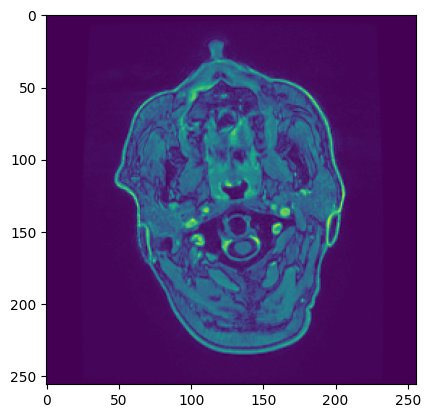

In [18]:
## TASK 2: Use plt.imshow to plot our slice 
plt.imshow(example_image)

In [ ]:
## TASK 3 : find the relevant dicom tag and determine the location of this slice
example_dcm.
print(f"position of slice is {example_dcm.SliceLocation}")


position of slice is -48.68263626


## Understanding `SliceLocation` in DICOM

The **`SliceLocation`** tag in a DICOM file represents the **relative position** of a slice along the scanning axis. It is usually measured in **millimeters (mm)**.

### 🔹 What Does `SliceLocation = -48` Mean?
- The slice is **48mm away from a reference plane** defined by the scanner.
- A **negative value** means the slice is **below the reference point**.

### 🔹 Key DICOM Tags for Positioning
| DICOM Tag | Meaning |
|-----------|---------|
| **`SliceLocation`** `(0020,1041)` | Relative position of the slice (scanner-defined). |
| **`ImagePositionPatient`** `(0020,0032)` | Absolute 3D coordinates of the slice in patient space (x, y, z). |
| **`ImageOrientationPatient`** `(0020,0037)` | Defines the anatomical plane (axial, sagittal, coronal). |

### 🔹 How to Interpret the Reference Plane
- **Axial (Transverse)** → Z changes → Example: Brain MRI  
- **Sagittal** → X changes → Example: Side view of the body  
- **Coronal** → Y changes → Example: Front-facing chest scan  

### 🔹 Summary
✅ `SliceLocation = -48` means **the slice is 48mm below the scanner's reference plane**.  
✅ **Use `ImagePositionPatient` for exact positioning.**  
✅ **Check `ImageOrientationPatient` to determine the slice orientation.**


`ImageOrientationPatient` Interpretation 

* [1, 0, 0, 0, 1, 0] → Axial (Transverse)
* [0, 1, 0, 0, 0, 1] → Sagittal
* [1, 0, 0, 0, 0, 1] → Coronal

---


In [20]:
print(example_dcm.ImagePositionPatient)

[-126.551, -173.907, -48.6826]


OK alot to unpack here the next few tasks needs some deep thinking from what we understand now that `ImagePositionPatient` and `SliceLocation` can help tell where is you slice located 

We will now put all slices together in one numpy object so we can have an entire MRI scan available just for us to have fun with !!

Do not worry we will do this with small steps.

In [21]:
## first let us try with one patient 
first_patient_path="HippocampalMRISlices/01"

## creating a list of all path for slices inside the "O1" folder
dicom_files = [os.path.join(first_patient_path, f) for f in os.listdir(first_patient_path) if f.endswith('.dcm')]


In [23]:
dicom_files[:3]

['HippocampalMRISlices/01/MR.1.2.246.352.221.46787942017866730226715780381946763929.dcm',
 'HippocampalMRISlices/01/MR.1.2.246.352.221.50526402510691757024825675546156477337.dcm',
 'HippocampalMRISlices/01/MR.1.2.246.352.221.49425505473402902245619940186516114354.dcm']

In [30]:
## creating on large list of dicom objects for every slice of the patient 01 
slices = [pydicom.dcmread(f) for f in dicom_files]

In [31]:
## now sort the list using ImagePositionPatient
slices.sort(key=lambda x: float(x.SliceLocation) if "SliceLocation" in x else float("inf")) 
## if is added here as some slices might have this attribute missing - so we throw them to the back
## infinity , a very large number, will be sorted last 

In [ ]:
#ok now the fun part 
# TASK 4 
# using .PixelArray to bring all slices in one 3d numpy array 
## add if to your list comprehension to account for corrupt files without PixelData
one_3d=np.array([s.pixel_array for s in slices if "PixelData" in s])

In [34]:
one_3d.shape

(276, 256, 256)

this means we have 276 slices each 256 by 256 

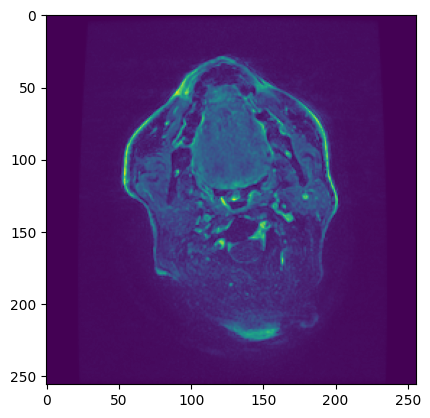

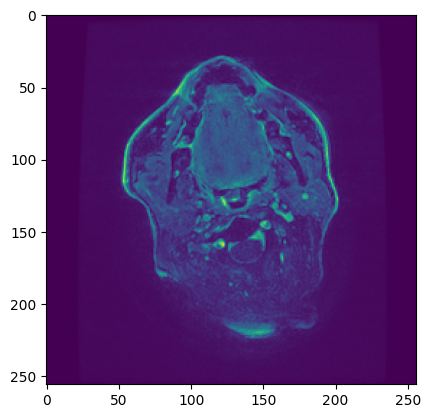

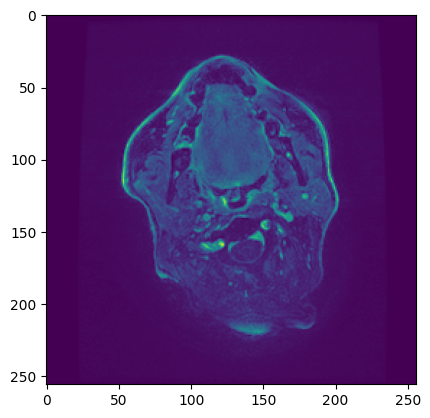

In [37]:
## TASK 5
## show the first 4 arrays and the last 4 arrays to check if sorting was really done properly 
for slice in one_3d[:3]:
    plt.imshow(slice)
    plt.show()

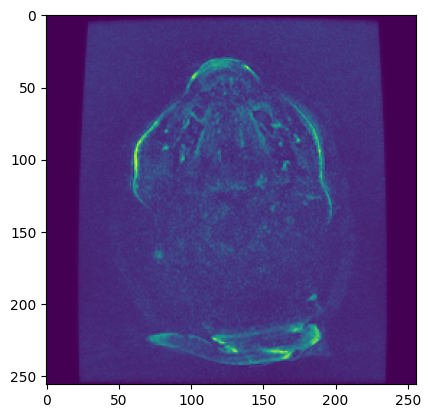

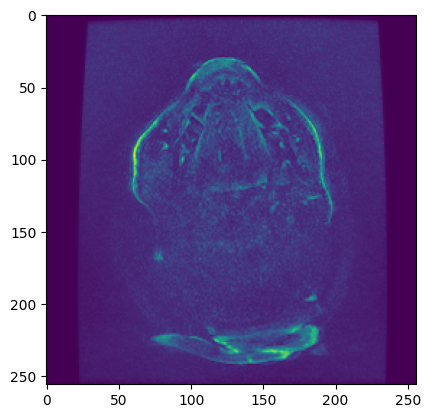

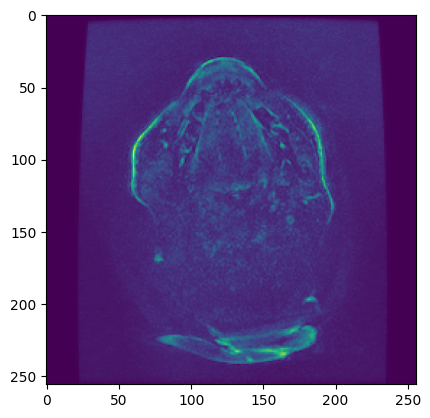

In [38]:
for slice in one_3d[-4:-1]:
    plt.imshow(slice)
    plt.show()

AHA our sorting seems correct !!

Now one final endeavour !
Having a 3D image allows you to reconstruct an image and view it in a different plane than the plane it was captured on

In [39]:
## TASK 6 : refer to our explanation earlier and relevant dicom tag to decide on the plane of our image
example_dcm.ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

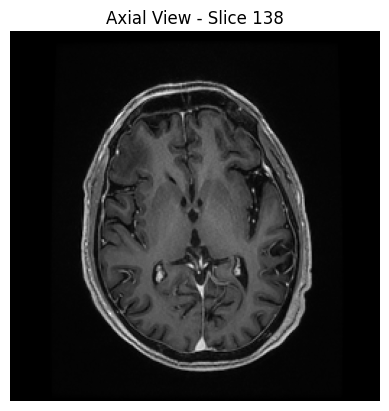

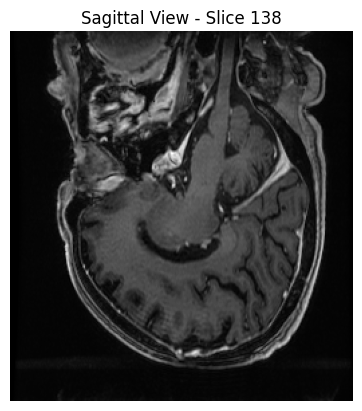

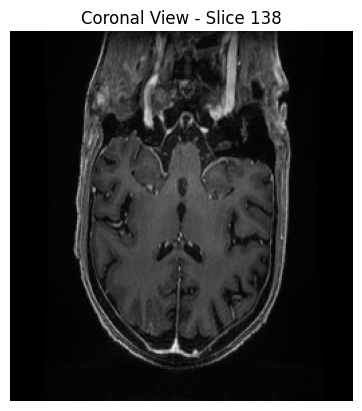

In [ ]:
## remember the planes? our 3D image is using a z,x,y coordinate system 
# TASK 6 : complete the following fucntion to show axial , sagital and coronal planes

def show_plane(volume, plane="axial", slice_idx=None):
    """Display an MRI slice in the specified plane (axial, sagittal, coronal)."""
    num_slices = volume.shape[0]  # Number of slices in original acquisition

    # Auto-select a middle slice if not specified
    if slice_idx is None:
        slice_idx = num_slices // 2

    if plane == "axial":
        slice_img = volume[slice_idx, :, :]  # Z-axis slice
    elif plane == "sagittal":
        slice_img = volume[:, :, slice_idx]  # X-axis slice ####### COMPLETE THIS 
    elif plane == "coronal":
        slice_img = volume[:, slice_idx, :]  # Y-axis slice ####### COMPLETE THIS 
    else:
        raise ValueError("Invalid plane! Choose from 'axial', 'sagittal', 'coronal'.")

    # Display the image
    plt.imshow(slice_img, cmap="gray")
    plt.title(f"{plane.capitalize()} View - Slice {slice_idx}")
    plt.axis("off")
    plt.show()

 ## Show different planes
show_plane(one_3d, "axial")     # Default axial view
show_plane(one_3d, "sagittal")  # Sagittal view
show_plane(one_3d, "coronal")   # Coronal view
 